In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

     |████████████████████████████████| 368kB 13.7MB/s eta 0:00:01


Prior to the previous notebook, this one is for the analysis of Computer students and some specific features only.
A few things to note:
1. DE computer engineering students in 300 level = 17
2. UTME computer engineering students in 300 level = 31
3. Total Computer engineering students in 300 level = 48
4. DE electrical engineering students in 300 level = 32
5. UTME electrical engineering students = 67
6. Total Electrical engineering students in 300 level = 99

Also note that computer and electrical students share the same class, both departments offer practically the same courses in 300 level and the survey lasted for 2 weeks.

In [5]:
#To load the previously saved dataframe df1
df = pd.read_csv('df1.csv', usecols = ['Name', 'Entry-mode', 'Dept', 'Lect-pref',
                                      'Reason-for-Lect-pref','Self-learn', 'Classlearn-grade',
                                      'Reason-for-Classlearn-grade','Selflearn-grade', 'Attend-grade'], index_col = 0)
df.head(2)

,Entry-mode,Dept,Lect-pref,Reason-for-Lect-pref,Self-learn,Classlearn-grade,Reason-for-Classlearn-grade,Selflearn-grade,Attend-grade
Name,,,,,,,,,
Arinze Owoh,UTME,Electrical Engineering,Classroom,I can ask more questions and learn more intera...,Yes,4,NaN,2,3
Ifeakor Nnaemeka Praise,UTME,Computer Engineering,Online,I prefer online because I don't learn in the c...,Yes,2,Most Lecturers don't calm down to teach They r...,4,3


In [6]:
df.shape

(89, 9)

In [7]:
#There are 89 entries, now to find the unique elements
df['Entry-mode'].unique()

array(['UTME', 'DE'], dtype=object)

In [8]:
#To know the value counts in the Entry mode column and Department Column
df['Entry-mode'].value_counts()

UTME    58
DE      31
Name: Entry-mode, dtype: int64

In [9]:
df.Dept.value_counts()

Electrical Engineering    52
Computer Engineering      37
Name: Dept, dtype: int64

In [10]:
#To select the UTME students alone and creating another dataframe
utme_df = df[df['Entry-mode'] == "UTME"]
utme_df['Entry-mode'].unique()

array(['UTME'], dtype=object)

In [11]:
#Now to know the number of computer engineering and Electrical engineering in this current dataframe
utme_df.Dept.value_counts()

Electrical Engineering    34
Computer Engineering      24
Name: Dept, dtype: int64

This corresponds to the total number of UTME students originally gotten.

In [12]:
#To find the DE computer engineering students that filled the survey.
DE_df= df[df['Entry-mode'] == 'DE']
DE_df.Dept.value_counts()

Electrical Engineering    18
Computer Engineering      13
Name: Dept, dtype: int64

In [13]:
#Total DE and UTME computer students
DE_numcomp = DE_df.Dept.value_counts()['Computer Engineering']
UTME_numcomp = utme_df.Dept.value_counts()['Computer Engineering']
total_DE_comp = 17
total_UTME_comp = 31 

There are 13 computer DE students who filled the survey. This is remarkable because there are actually only 17 DE students in the entire computer engineering department. Also 24 out of 31 utme computer students participated in the survey.

So my first insight is basic:
Computer students are more responsive to surveys than electrical students. Why? because a total of 37 out of 48 computer students (more than 75%) took part in the survey(which lasted for 2 weeks).

Which is practically the reason why i decided to create a seperate notebook for them. There is more data to work with than the electrical students.



In [14]:
#The visualisation is as follows
plot_df = pd.DataFrame({'UTME Computer': [UTME_numcomp, (total_UTME_comp - UTME_numcomp)], 
                        'DE Computer': [DE_numcomp, (total_DE_comp - DE_numcomp)]},
                      index = ['Filled', 'Did not Fill'])
plot_df['Total'] = plot_df.sum(axis = 1)
plot_df

,UTME Computer,DE Computer,Total
Filled,24,13,37
Did not Fill,7,4,11


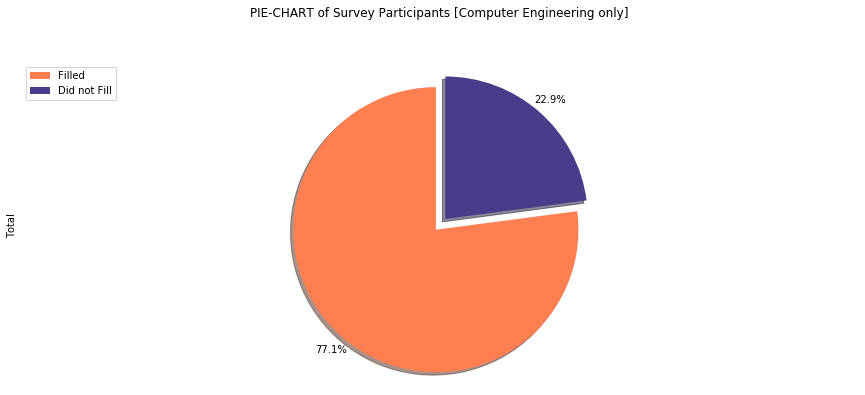

In [15]:
colors_list = ['coral', 'darkslateblue']
explode_list = [0.1, 0] 

plot_df['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list
                            )

plt.title('PIE-CHART of Survey Participants [Computer Engineering only]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(plot_df.index, loc='upper left') 

plt.show()

In [18]:
#Lets check out the visuaalisation for those that filled and did not fill for electrical students
DE_numelect = DE_df.Dept.value_counts()['Electrical Engineering']
UTME_numelect = utme_df.Dept.value_counts()['Electrical Engineering']
total_DE_elect = 32
total_UTME_elect = 67

#getting the dataframe
elect_df = pd.DataFrame({'UTME elect': [UTME_numelect, (total_UTME_elect - UTME_numelect)], 
                        'DE elect': [DE_numelect, (total_DE_elect - DE_numelect)]},
                      index = ['Filled', 'Did not Fill'])
elect_df['Total'] = elect_df.sum(axis = 1)
elect_df

,UTME elect,DE elect,Total
Filled,34,18,52
Did not Fill,33,14,47


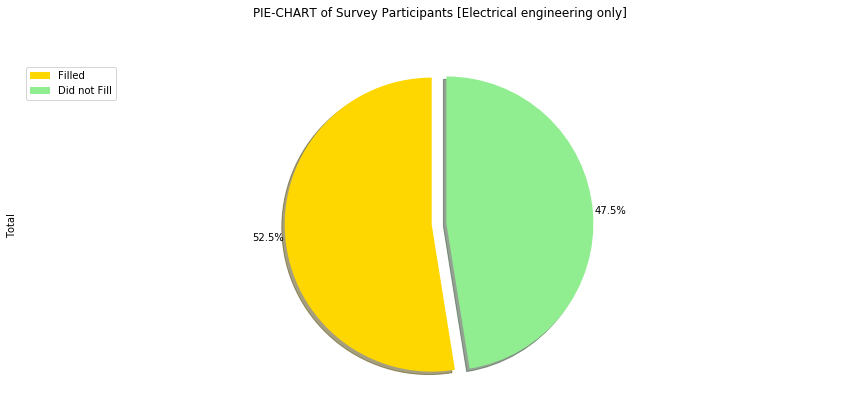

In [19]:
colors_list = ['gold', 'lightgreen']
explode_list = [0.1, 0] 

elect_df['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list
                            )

plt.title('PIE-CHART of Survey Participants [Electrical engineering only]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(plot_df.index, loc='upper left') 

plt.show()

More computer students filled the survey

**First let's analyze the UTME computer students and their features**

In [147]:
utme_comp = utme_df[utme_df.Dept == 'Computer Engineering']
#Lets see the new dataframe
utme_comp.Dept.unique()

array(['Computer Engineering'], dtype=object)

In [148]:
#To see the lecture preference of utme
utme_comp['Lect-pref'].value_counts()

Classroom    13
Online       11
Name: Lect-pref, dtype: int64

In [149]:
utme_comp['Lect-pref'].value_counts().to_frame(name = 'Count')

,Count
Classroom,13
Online,11


So, still more people prefer learning in the classroom, but now 11 out of 13 of the UTME computer students prefer online lectures. The reason for this choice should yield some valuable information

In [150]:
#To check for missing values
utme_comp['Reason-for-Lect-pref'].isna()

Name
Ifeakor Nnaemeka Praise         False
Nwachukwu Chidiebere Godwin     False
Favour Adepoju                  False
Catherine Olorunfemi            False
Stephen                         False
Paul-Sodipo Giovanni            False
Bashir Raji                     False
Toluwanimi Ogunbona              True
Daniel Arikawe                   True
Da-Walang Simi                  False
Obinna Amadi                    False
Susan Alabi                     False
Godspower Innocent              False
Zaccheaus Elisha                False
Lateefat Rahman                 False
Rasak Ojoola                    False
AJANI OYINLOLA                  False
Arthur Chukwurah                False
Chukwudumebi Onwuli             False
James Obioma                    False
Adeniran. A                     False
Oshinowo Joshua                 False
Inuojo Victor Tolulope          False
Akintoye Faith                  False
Name: Reason-for-Lect-pref, dtype: bool

In [151]:
utme_comp['Reason-for-Lect-pref'].isna().sum()

2

So there are only 2 people who did not give reasons for picking their preferred lecture preference out of 24 people. These two can be dropped.

In [152]:
a = utme_comp.dropna()
#Cross check after dropping
a['Reason-for-Lect-pref'].isna().sum()

0

In [153]:
#Now to visualise the reasons for online
online_pick = a[a['Lect-pref'] == 'Online']

#converting the reasons to list
lr = online_pick['Reason-for-Lect-pref'].to_list()

#converting the list to string
lr_string = "".join(lr)
type(lr_string)

str

In [154]:
stopwords = set(STOPWORDS)

#instantiate wordcloud object
Reason_for_online_wc = WordCloud(background_color = 'white', max_words = 200, 
                               stopwords = stopwords)

#generating wordcloud
Reason_for_online_wc.generate(lr_string)

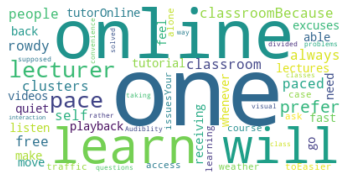

In [155]:
plt.imshow(Reason_for_online_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

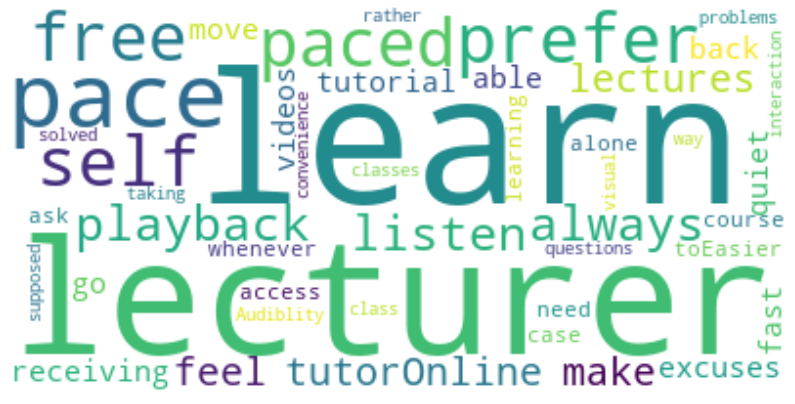

In [156]:
#The wordcloud looks good but words like 'classroom', 'one', 'clusters','people', 'issuesYour', 'rowdy', 'divided'
#classroomBecause', 'will', 'upClasses', 'traffic'
#and 'weather' have no inherent meaning in the cloud.

stopwords.add('classroom')
stopwords.add('one')
stopwords.add('clusters')
stopwords.add('people')
stopwords.add('classroomBecause') 
stopwords.add('will')
stopwords.add('issuesYour')
stopwords.add('upClasses')
stopwords.add('traffic')
stopwords.add('weather')
stopwords.add('rowdy')
stopwords.add('divided')
stopwords.add('online')

#regenrating the wordcloud
Reason_for_online_wc.generate(lr_string)

#displaying the wordlcoud and increasing the size
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(Reason_for_online_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**The two most consistent words among the reasons given are LECTURER and LEARN**. Other words like '*', 'free', 'prefer', 'playback','pace','self'* etc are consistent with the reasons given, which are valid points if one is to expediently state why he or she prefers learning online. It is therefore plausible to say that nearly half of computer utme students prefer online lecturing because of the type of Lecturers and learning content they get to experience. 

If that is true then there must be something wrong with the Lecturers and learning content experienced in the classroom. The validity of the insight above can be proved by the classroom learning experience.

In [157]:
#To find out more about the classroom learning experience by highlighting the Classlearn-grade and reason
#for class learn grade features
ump = a[['Classlearn-grade', 'Reason-for-Classlearn-grade']]
#To find out how many graded less than 3
ump1 = ump[ump['Classlearn-grade'] < 3]

#selecting the new dataframe
new_ump = ump1[['Classlearn-grade', 'Reason-for-Classlearn-grade']]
new_ump.shape

(12, 2)

In [158]:
#To find out their reasons
#to check for missing values in the reasons
ump1.isna().sum()

Classlearn-grade               0
Reason-for-Classlearn-grade    0
dtype: int64

In [159]:
#generating a wordcloud for their reasons to find consistent words
#converting the reasons to list
mr = ump1['Reason-for-Classlearn-grade'].to_list()

#converting the list to string
mr_string = "".join(mr)
Reason_for_Classlearn_wc = WordCloud(background_color = 'white', max_words = 200, 
                               stopwords = stopwords)

#generating wordcloud
Reason_for_Classlearn_wc.generate(mr_string)

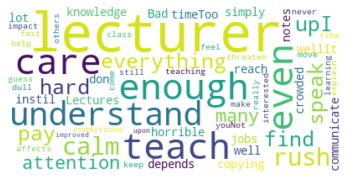

In [160]:
plt.imshow(Reason_for_Classlearn_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

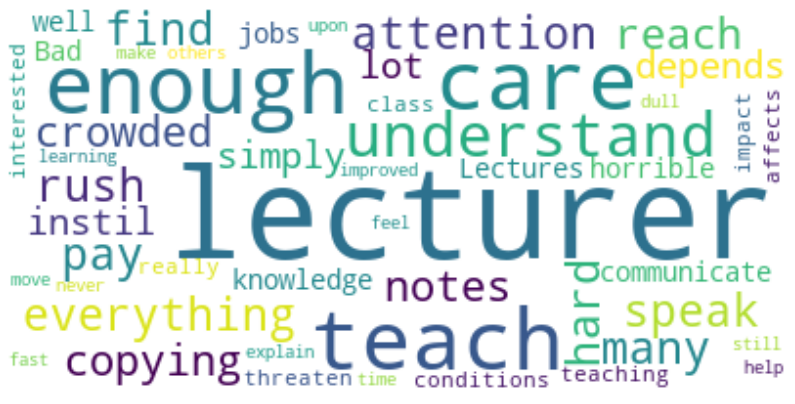

In [161]:
#The wordcloud looks good but words like 'upI', 'keep', 'calm','wellIt', 'guess', 'don', 'come', 'even', Timetoo', 'youNot'
#have no inherent meaning in the cloud.

stopwords.add('upI')
stopwords.add('keep')
stopwords.add('calm')
stopwords.add('wellIt')
stopwords.add('guess') 
stopwords.add('don')
stopwords.add('come')
stopwords.add('Timetoo')
stopwords.add('youNot')
stopwords.add('even')
#regenrating the wordcloud
Reason_for_Classlearn_wc.generate(mr_string)

#displaying the wordlcoud and increasing the size
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(Reason_for_Classlearn_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Again, **Lecturer** comes up bold as a Lion. Other words include *understand, care, crowded, teach, enough, rush, attention, threaten, hard, everything* etc. 

It is reasonable to assume that the **Lecturers** are not doing their jobs like they are supposed to. It is also reasonable to assume that the classrooms are **crowded, teaching** doesn't take place, the **experience** is horrible and **understanding** is limited in the class. Practically half of the UTME students are pretty upset. 

**For the DE students and their features**

In [162]:
#For the DE students,
de_comp = DE_df[DE_df.Dept == 'Computer Engineering']
de_comp.Dept.value_counts()

Computer Engineering    13
Name: Dept, dtype: int64

In [163]:
#To check for those that prefer online
de_comp['Lect-pref'].value_counts()

Classroom    10
Online        3
Name: Lect-pref, dtype: int64

Clearly, more computer DE students prefer to learn in the classroom. In fact just 3 out of 13 prefer online tutoring, which is just about 23% of the total. 

In [164]:
#The visualisation is as follows:
qx = de_comp['Lect-pref'].value_counts().to_frame(name = 'Count')
qx

,Count
Classroom,10
Online,3


Text(0.5, 0, 'Count')

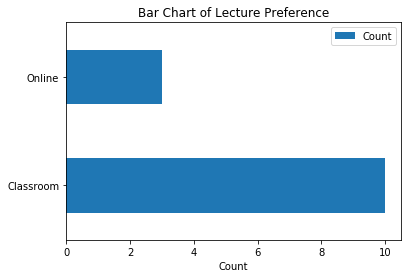

In [165]:
qx.plot.barh()
plt.title('Bar Chart of Lecture Preference')
plt.xlabel("Count")

More DE students prefer to learn in the classroom. Let's find out about their Classlearn grade:

In [166]:
#To find out about how many DE students graded less than 
ad = de_comp[de_comp['Classlearn-grade'] < 3]
ad.shape #To know how many rows in this new dataframe

(6, 9)

In [167]:
#to find out count of less than 3 grade
ad['Classlearn-grade'].value_counts()

2    5
1    1
Name: Classlearn-grade, dtype: int64

In [168]:
#To find out total count of grades for computer de students
de_comp['Classlearn-grade'].value_counts()

3    7
2    5
1    1
Name: Classlearn-grade, dtype: int64

Now, 6 people graded their learning in class less than 3, while the remaining 7 graded their learning in class at 3(the average threshold). This is bad news because it then means that all the computer engineering DE student's learning grade occur below the 60th percentile. Not one single person grades their learning above a 3. It's either average or below average. The reasons given by those who graded less than 3 will definitely explain what is really going on. (Remember this is the **most cooperative sect**).

Let's see the most consistent words used by the 6 students that graded their learning below 3.

In [169]:
ar = ad['Reason-for-Classlearn-grade'].to_list()
ar_string = "".join(ar)
type(ar_string)

str

In [170]:
#generating the wordcloud
Reason_for_Classlearn_de_wc = WordCloud(background_color = 'white', max_words = 200, 
                               stopwords = stopwords)

#generating wordcloud
Reason_for_Classlearn_de_wc.generate(ar_string)

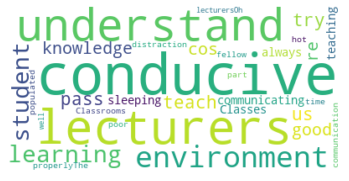

In [171]:
plt.imshow(Reason_for_Classlearn_de_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

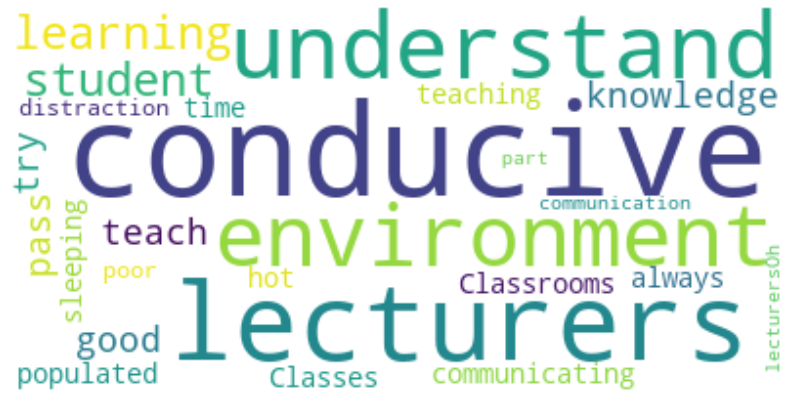

In [172]:
#The wordcloud looks good but words like 'well', 're', 'us','cos', 'even', 'fellow', 'properlyThe',
#have no inherent meaning in the cloud.

stopwords.add('well')
stopwords.add('re')
stopwords.add('us')
stopwords.add('cos')
stopwords.add('even') 
stopwords.add('fellow')
stopwords.add('properlyThe')

#regenrating the wordcloud
Reason_for_Classlearn_de_wc.generate(ar_string)

#displaying the wordlcoud and increasing the size
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(Reason_for_Classlearn_de_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Conducive, Lecturers(again) and understand** seem to stand out. Other words include *environment, teaching, communication* etc. This is definitely proof that:

1. The **Lecturers** seem to influence the grading of students in the survey
2. The environment is not **conducive** for students who grade their learning less than 3
3. Students who grade their learning less than 3 do not **understand** what they are being taught in class.





In [173]:
#Now back to the original dataframe df
df.columns.values


array(['Entry-mode', 'Dept', 'Lect-pref', 'Reason-for-Lect-pref',
       'Self-learn', 'Classlearn-grade', 'Reason-for-Classlearn-grade',
       'Selflearn-grade', 'Attend-grade'], dtype=object)

In [174]:
#to check out the selflearn and Attend grade features
new_df = df[['Dept','Selflearn-grade', 'Attend-grade','Classlearn-grade']]
new_df.head()

,Dept,Selflearn-grade,Attend-grade,Classlearn-grade
Name,,,,
Arinze Owoh,Electrical Engineering,2,3,4
Ifeakor Nnaemeka Praise,Computer Engineering,4,3,2
Nwachukwu Chidiebere Godwin,Computer Engineering,5,4,1
Bello Oluwatomisin Oreoluwa,Electrical Engineering,1,3,3
Boss,Computer Engineering,4,3,3


Ooops!, there are some electrical students in this dataframe. We are only dealing with computer students here.

In [175]:
new_df = new_df[new_df.Dept == 'Computer Engineering']
new_df.Dept.unique()

array(['Computer Engineering'], dtype=object)

In [176]:
#Now to find out the overall self learn grade
new_df['Selflearn-grade'].value_counts()

4    21
3    10
5     5
1     1
Name: Selflearn-grade, dtype: int64

In [177]:
#To find out the overall Attendance grade
new_df['Attend-grade'].value_counts()

4    17
3    10
5     5
2     5
Name: Attend-grade, dtype: int64

In [178]:
new_df['Classlearn-grade'].value_counts()

3    17
2    14
1     6
Name: Classlearn-grade, dtype: int64

In [179]:
#visualisation for Attend-grade, Claslearn-grade and Selflearn-grade
clg_mean =round(new_df['Classlearn-grade'].mean(), 4)
slf_mean = round(new_df['Selflearn-grade'].mean(), 4) 
att_mean = round(new_df['Attend-grade'].mean(), 4)
                    
bar_df = pd.DataFrame({'Mean-Grade': [clg_mean, slf_mean, att_mean]}, 
                       index = ['Learning in Class', 'Learning on your own', 'Attendance record'])
bar_df

,Mean-Grade
Learning in Class,2.2973
Learning on your own,3.7838
Attendance record,3.5946


Note that students attend more classes than they learn in them. How unfortunate. 
Although it is good they attend more classes so that the information obtained above can be authenticated by their frequent visits to class.

Text(0.5, 1.0, 'Bar Chart of mean Learning grades [Computer Students only]')

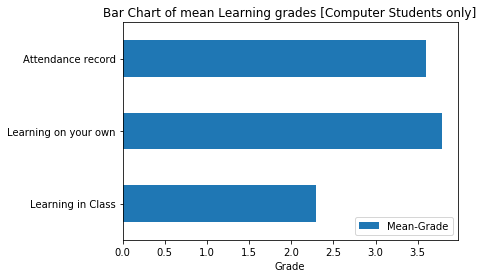

In [180]:
bar_df.plot.barh()
plt.xlabel('Grade')
plt.title('Bar Chart of mean Learning grades [Computer Students only]')

Notice any relationship between this notebook and the Total set analysis notebook?

*This notebook was created by Ifeakor Nnaemeka Praise, a computer engineering student of the University of Lagos. At the time this analysis was done, he was in 300 level.*


**DISCLAIMER: The insights obtained from the dataset does not directly in reality reflect the opinion of the analyst or the students that participated in the survey. The survey was carried out specifically for educational, analytical and exploratory purposes only.**